In [ ]:
import pandas as pd
import numpy as np
from google.colab import files
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
upload = files.upload()
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import *
from sklearn.ensemble import GradientBoostingRegressor
from numpy import arange
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

Saving train.csv to train (1).csv


In [ ]:
dataset = pd.read_csv('train.csv')
dataset.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [ ]:
dataset.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871


In [ ]:
dataset.shape

(550068, 12)

In [ ]:
#Checking for nan values in all columns
column_list = list(dataset.columns)
def checkForMissingValue(df, col_list):
    for col_name in col_list:
        check_nan = df[col_name].isnull().values.any()
        if check_nan == True:
            print('\n\nNan values at column '+col_name)
            print(df[col_name].isnull().sum())
# Cannot remove data as it will reduce the data to work with
#checkForMissingValue(dataset,column_list)

In [ ]:
dataset.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [ ]:
dataset.shape

(550068, 12)

In [ ]:
dataset.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871


In [ ]:
#Checking for Noise
dataset[column_list[3]].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [ ]:
dataset[column_list[2]].unique()

array(['F', 'M'], dtype=object)

In [ ]:
occ = sorted(list(dataset[column_list[4]].unique()))
print(occ)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


In [ ]:
stayInCity = sorted(list(dataset[column_list[6]].unique()))
print(stayInCity)

['0', '1', '2', '3', '4+']


In [ ]:
martial_status = sorted(list(dataset[column_list[7]].unique()))
print(martial_status)

[0, 1]


In [ ]:
prod1 = sorted(list(dataset[column_list[8]].unique()))
print(prod1)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


In [ ]:
prod2 = sorted(list(dataset[column_list[9]].unique()))
print(prod2)

[nan, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0]


In [ ]:
prod3 = sorted(list(dataset[column_list[10]].unique()))
print(prod3)

[nan, 3.0, 4.0, 5.0, 6.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0]


In [ ]:
purchase = list(dataset[column_list[11]])
print(min(purchase), purchase.count(min(purchase)))
print(max(purchase), purchase.count(max(purchase)))

12 101
23961 3


In [ ]:
#Categorising ages into groups:

def ages(value):
    if '0-17' in value:
        value=value.replace('0-17','child')
        return str(value)
    elif '26-35'in value:
        value=value.replace('26-35','adult')
        return str(value)
    elif '18-25'in value:
        value=value.replace('18-25','teenage')
        return str(value)
    elif '36-45'in value:
        value=value.replace('36-45','adult')
        return str(value)
    elif '46-50'in value:
        value=value.replace('46-50','adult')
        return str(value)
    elif '51-55'in value:
        value=value.replace('51-55','old')
        return str(value)
    else:
        value=value.replace('55+','old')
        return str(value)
dataset['Age']=dataset['Age'].apply(ages)

In [ ]:
dataset['Age'].unique()

array(['child', 'old', 'adult', 'teenage'], dtype=object)

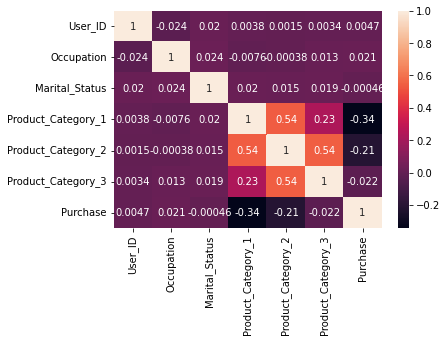

In [ ]:
sns.heatmap(dataset.corr() ,annot=True)

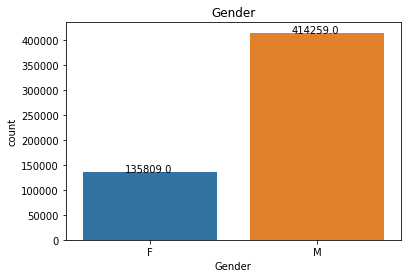

In [ ]:
#gender vs count
plt.title('Gender')
ax = sns.countplot(x="Gender", data=dataset)

for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.03))


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


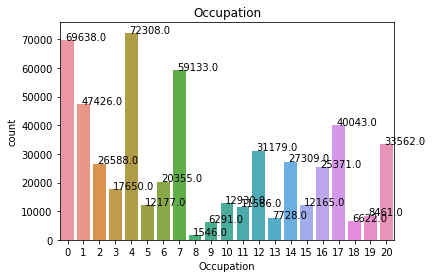

In [ ]:
#occupation vs count
plt.title('Occupation')
ax = sns.countplot(dataset['Occupation'])

for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.05))

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


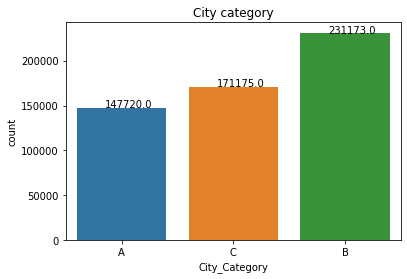

In [ ]:
#city category vs count
plt.title('City category')
ax = sns.countplot(dataset['City_Category'])

for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.05))

,City_Category
City_Category,
A,147720
B,231173
C,171175


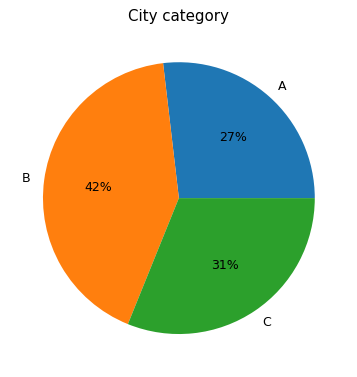

In [ ]:
#city category
plt.figure(figsize=(5,5),dpi=90)
plt.title('City category')
palette_color=sns.color_palette('bright')
b=dataset.groupby('City_Category')['City_Category'].agg('count')
display(b.to_frame())
plt.pie(b,labels=b.index,autopct='%.0f%%')
plt.show()

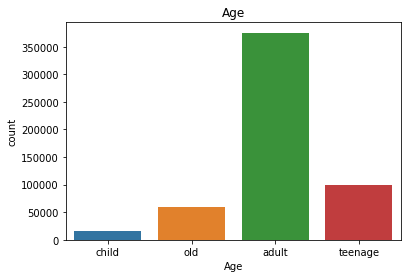

In [ ]:
#age vs count
plt.title('Age')
sns.countplot(x='Age',data=dataset)

,Age
Age,
adult,375301
child,15102
old,60005
teenage,99660


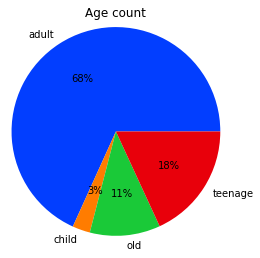

In [ ]:
a=dataset.groupby('Age')['Age'].agg('count')
display(a.to_frame())
plt.title('Age count')
palette_color=sns.color_palette('bright')
plt.pie(a, colors=palette_color,labels=a.index,radius=1.2,autopct='%.0f%%')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


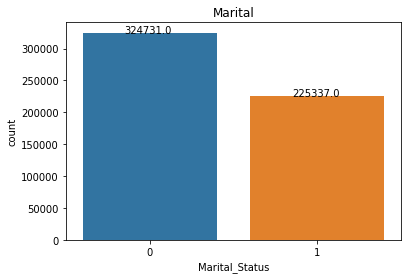

In [ ]:
#marital status vs count
plt.title('Marital')
ax = sns.countplot(dataset['Marital_Status'],)

for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.05))

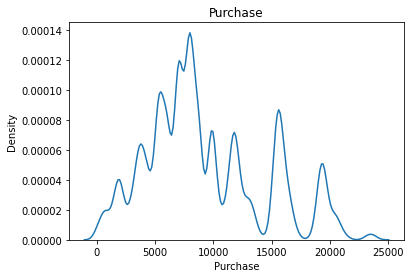

In [ ]:
#purchase density plot
plt.title('Purchase')
sns.kdeplot(dataset['Purchase'])


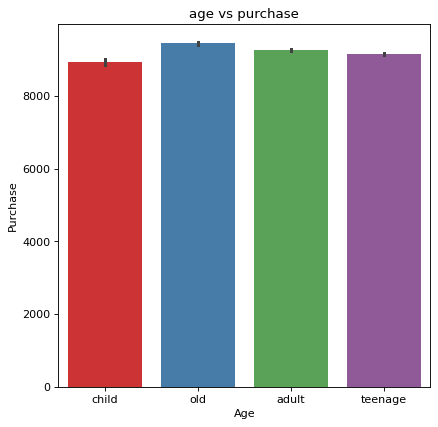

In [ ]:
#age vs purchase
plt.figure(figsize=(6,6),dpi=80)
plt.title('age vs purchase')
sns.barplot(x='Age',y='Purchase',data=dataset,palette='Set1')

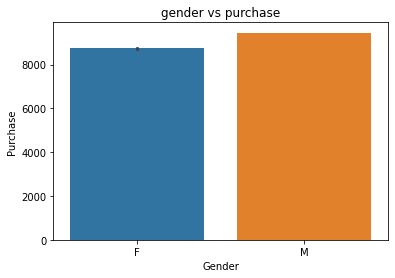

In [ ]:
#gender vs purchase
plt.title('gender vs purchase')
sns.barplot(x='Gender',y='Purchase',data=dataset)

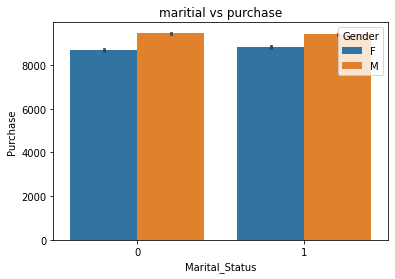

In [ ]:
#marital status vs purchase
plt.title('maritial vs purchase')
sns.barplot(x='Marital_Status',y='Purchase',hue='Gender',data=dataset)

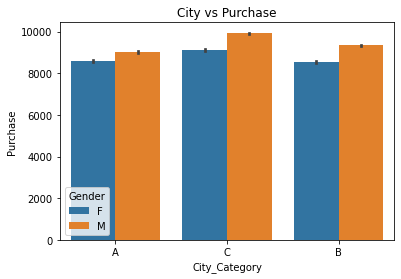

In [ ]:
#city vs purchase
plt.title('City vs Purchase')
sns.barplot(data=dataset,x='City_Category',y='Purchase',hue='Gender')


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

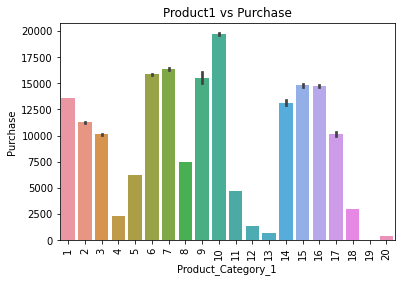

In [ ]:
#Product1 vs purchase
plt.title('Product1 vs Purchase')
sns.barplot(x='Product_Category_1',y='Purchase',data=dataset)
plt.xticks(rotation=90)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text major ticklabel objects>)

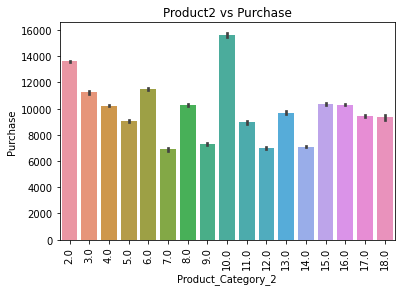

In [ ]:
#Product2 vs purchase
plt.title('Product2 vs Purchase')
sns.barplot(x='Product_Category_2',y='Purchase',data=dataset)
plt.xticks(rotation=90)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

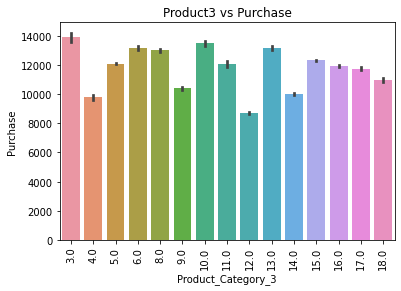

In [ ]:
#Product3 vs purchase
plt.title('Product3 vs Purchase')
sns.barplot(x='Product_Category_3',y='Purchase',data=dataset)
plt.xticks(rotation=90)


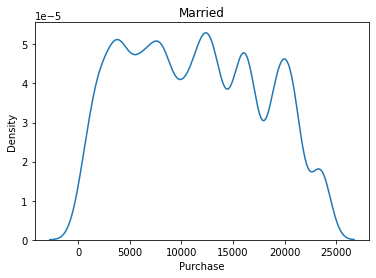

In [ ]:
um=dataset[dataset['Marital_Status']==0].value_counts('Purchase')
plt.title('Married')
sns.kdeplot('Purchase',data=um)

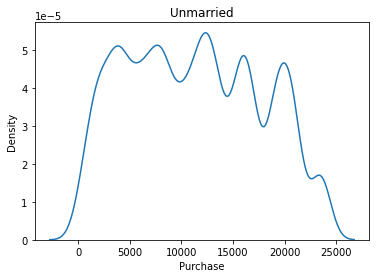

In [ ]:
m=dataset[dataset['Marital_Status']==1].value_counts('Purchase')
plt.title('Unmarried')
sns.kdeplot('Purchase',data=m)

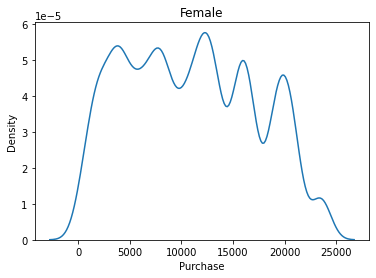

In [ ]:
f=dataset[dataset['Gender']=='F'].value_counts('Purchase')
plt.title('Female')
sns.kdeplot('Purchase',data=f)

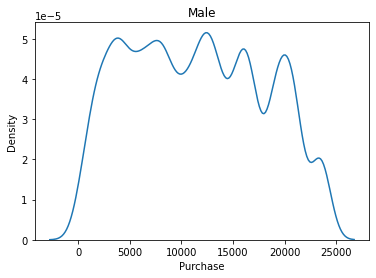

In [ ]:
m=dataset[dataset['Gender']=='M'].value_counts('Purchase')
plt.title('Male')
sns.kdeplot('Purchase',data=m)

In [ ]:
# to improve the metric use one hot encoding
# label encoding
cols = ['Gender','Age', 'City_Category', 'Stay_In_Current_City_Years']
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in cols:
    dataset[col] = le.fit_transform(dataset[col])
dataset.head()


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,1,10,0,2,0,3,NaN,NaN,8370
1,1000001,P00248942,0,1,10,0,2,0,1,6.0,14.0,15200
2,1000001,P00087842,0,1,10,0,2,0,12,NaN,NaN,1422
3,1000001,P00085442,0,1,10,0,2,0,12,14.0,NaN,1057
4,1000002,P00285442,1,2,16,2,4,0,8,NaN,NaN,7969


In [ ]:
# removing unwanted columns

# saving the attributes User_ID and Product_ID before deleting them
User_ID = dataset['User_ID']
Product_ID = dataset['Product_ID']

dataset = dataset.drop(['User_ID', 'Product_ID'], axis = 1)

# checking the new shape of data
dataset.shape

(550068, 10)

In [ ]:
# filling the missing values

dataset['Product_Category_2'].fillna(0, inplace = True)
dataset['Product_Category_3'].fillna(0, inplace = True)

dataset.isnull().sum()
dataset.head(10)

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,1,10,0,2,0,3,0.0,0.0,8370
1,0,1,10,0,2,0,1,6.0,14.0,15200
2,0,1,10,0,2,0,12,0.0,0.0,1422
3,0,1,10,0,2,0,12,14.0,0.0,1057
4,1,2,16,2,4,0,8,0.0,0.0,7969
5,1,0,15,0,3,0,1,2.0,0.0,15227
6,1,0,7,1,2,1,1,8.0,17.0,19215
7,1,0,7,1,2,1,1,15.0,0.0,15854
8,1,0,7,1,2,1,1,16.0,0.0,15686
9,1,0,20,0,1,1,8,0.0,0.0,7871


In [ ]:
# making dummies of variables
# performing one hot encoding


data = pd.get_dummies(dataset)

# checking the shape of new dataset
#data.shape

In [ ]:
# splitting the data into dependent and independents sets

y = dataset['Purchase']

# now removing the purchase column from the dataset
dataset = dataset.drop(['Purchase'], axis = 1)

x = dataset

# checking the shapes of x and y
print("Shape of x: ", x.shape)
print("Shape of y: ", y.shape)

Shape of x:  (550068, 9)
Shape of y:  (550068,)


In [ ]:
# splitting into training and testing

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 15)

print("Shape of x_train: ", x_train.shape)
print("Shape of x_test: ", x_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ",y_test.shape)

Shape of x_train:  (385047, 9)
Shape of x_test:  (165021, 9)
Shape of y_train:  (385047,)
Shape of y_test:  (165021,)


In [ ]:
# standardization

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
#ElasticNet model
grid = dict()
grid['alpha'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1.0, 10.0, 100.0]
grid['l1_ratio'] = arange(0.1, 1, 0.01)

e_Net = GridSearchCV(estimator=ElasticNet(), param_grid= grid, cv=3, scoring='neg_mean_squared_error')

e_Net.fit(x_train, y_train)

print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",e_Net.best_estimator_)
print("\n The best score across ALL searched params:\n",e_Net.best_score_)
print("\n The best parameters across ALL searched params:\n",e_Net.best_params_)

y_pred = e_Net.predict(x_test)


# finding the mean_squared error
mse = mean_squared_error(y_test, y_pred)
print("RMSE Error:", np.sqrt(mse))

# finding the r2 score or the variance
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)



 Results from Grid Search 

 The best estimator across ALL searched params:
 ElasticNet(alpha=0.001, l1_ratio=0.6099999999999998)

 The best score across ALL searched params:
 -21375926.74771474

 The best parameters across ALL searched params:
 {'alpha': 0.001, 'l1_ratio': 0.6099999999999998}
RMSE Error: 4635.257292738916
R2 Score: 0.15249838117246728


In [ ]:
#Ridge Regression model
params_Ridge = {'alpha': [1,0.1,0.01,0.001,0.0001,0] , "fit_intercept": [True, False], "solver": ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}

# define the model/ estimator
model = Ridge()

# define the grid search
Ridge_reg= GridSearchCV(model, param_grid=params_Ridge,cv=3, n_jobs=-1)

#fit the grid search
Ridge_reg.fit(x_train, y_train)

print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",Ridge_reg.best_estimator_)
print("\n The best score across ALL searched params:\n",Ridge_reg.best_score_)
print("\n The best parameters across ALL searched params:\n",Ridge_reg.best_params_)

# finding the mean_squared error
mse = mean_squared_error(y_test, y_pred)
print("RMSE Error:", np.sqrt(mse))

# finding the r2 score or the variance
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)



/usr/local/lib/python3.8/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


 Results from Grid Search 

 The best estimator across ALL searched params:
 Ridge(alpha=1, solver='sparse_cg')

 The best score across ALL searched params:
 0.15105721144127002

 The best parameters across ALL searched params:
 {'alpha': 1, 'fit_intercept': True, 'solver': 'sparse_cg'}
RMSE Error: 4635.257292738916
R2 Score: 0.15249838117246728


In [ ]:
#Lasso Regression model
lasso_params = {'alpha': (np.logspace(-8, 8, 100))}
las= GridSearchCV(Lasso(), param_grid=lasso_params, cv=10)
las.fit(x_train,y_train)
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",las.best_estimator_)
print("\n The best score across ALL searched params:\n",las.best_score_)
print("\n The best parameters across ALL searched params:\n",las.best_params_)

# finding the mean_squared error
mse = mean_squared_error(y_test, y_pred)
print("RMSE Error:", np.sqrt(mse))

# finding the r2 score or the variance
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)


 Results from Grid Search 

 The best estimator across ALL searched params:
 Lasso(alpha=0.013848863713938746)

 The best score across ALL searched params:
 0.15102673008612283

 The best parameters across ALL searched params:
 {'alpha': 0.013848863713938746}
RMSE Error: 4635.257292738916
R2 Score: 0.15249838117246728


In [ ]:
#Gradient Boosting model
model = GradientBoostingRegressor(n_estimators = 550, max_depth = 9, min_samples_split = 2, learning_rate = 0.2)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)


# finding the mean_squared error
mse4 = mean_squared_error(y_test, y_pred)
print("RMSE Error:", np.sqrt(mse4))

# finding the r2 score or the variance
r24 = r2_score(y_test, y_pred)
print("R2 Score:", r24)


RMSE Error: 2956.5189373028443
R2 Score: 0.6552103862226184


In [ ]:
# Random Forest model
param_list = {"n_estimators":[50, 100, 150, 300, 500], \
              "max_depth":[1, 3, 5, 7, 9]}
grid = GridSearchCV(RandomForestRegressor(), param_list, cv=5, scoring="neg_mean_squared_error").fit(x_train, y_train)
print("Best parameter: {}".format(grid.best_params_))

model = RandomForestRegressor(n_estimators=500, max_depth=9, random_state=1, verbose=1)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

# finding the mean_squared error
mse = mean_squared_error(y_test, y_pred)
print("RMSE Error:", np.sqrt(mse))

# finding the r2 score or the variance
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)
